In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

In [ ]:
#1. A/B 테스트 신뢰구간 분석

# A/B 테스트 데이터 생성
np.random.seed(404)

# A그룹 (기존 디자인): 전환율 12%
n_a = 500
conversion_rate_a = 0.12
conversions_a = np.random.binomial(1, conversion_rate_a, n_a)

# B그룹 (새 디자인): 전환율 15%
n_b = 500
conversion_rate_b = 0.15
conversions_b = np.random.binomial(1, conversion_rate_b, n_b)

# 데이터프레임 생성
ab_test_data = pd.DataFrame({
    'group': ['A']*n_a + ['B']*n_b,
    'user_id': range(1, n_a + n_b + 1),
    'converted': np.concatenate([conversions_a, conversions_b])
})

print("🧪 A/B 테스트 데이터")
print(f"A그룹 사용자 수: {n_a}명")
print(f"B그룹 사용자 수: {n_b}명")
print("\n그룹별 전환율:")
conversion_summary = ab_test_data.groupby('group')['converted'].agg(['count', 'sum', 'mean'])
conversion_summary.columns = ['총_사용자수', '전환_사용자수', '전환율']
print(conversion_summary)


🧪 A/B 테스트 데이터
A그룹 사용자 수: 500명
B그룹 사용자 수: 500명

그룹별 전환율:
       총_사용자수  전환_사용자수    전환율
group                        
A         500       60  0.120
B         500       56  0.112


In [ ]:
#1.1. 기본 통계량 계산

# TODO: p_a 계산하기 (A그룹 전환율)
p_a = np.mean(conversions_a)

# TODO: p_b 계산하기 (B그룹 전환율)
p_b = np.mean(conversions_b)

# TODO: A그룹 표준오차 계산하기
# 힌트: 비율의 표준오차 공식은 sqrt(p(1-p)/n)
se_a = np.sqrt(p_a * (1 - p_a) / n_a)

# TODO: B그룹 표준오차 계산하기
se_b = np.sqrt(p_b * (1 - p_b) / n_b)

print(f"A그룹 전환율: {p_a:.3f} ± {se_a:.3f}")
print(f"B그룹 전환율: {p_b:.3f} ± {se_b:.3f}")


A그룹 전환율: 0.120 ± 0.015
B그룹 전환율: 0.112 ± 0.014


In [ ]:
#1.2. A그룹 신뢰구간 계산
z_score = 1.96

ci_a_lower = p_a - z_score * se_a

ci_a_upper = p_a + z_score * se_a

print(f"A그룹 95% 신뢰구간: [{ci_a_lower:.3f}, {ci_a_upper:.3f}]")

A그룹 95% 신뢰구간: [0.092, 0.148]


In [ ]:
#1.3. B그룹 신뢰구간 계산

ci_b_lower = p_b - z_score * se_b

ci_b_upper = p_b + z_score * se_b

print(f"B그룹 95% 신뢰구간: [{ci_b_lower:.3f}, {ci_b_upper:.3f}]")

B그룹 95% 신뢰구간: [0.084, 0.140]


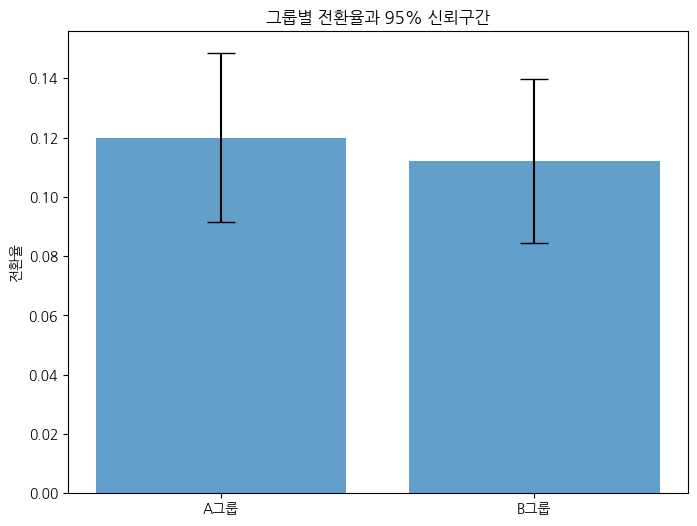

In [ ]:
#1.4. 그룹별 신뢰구간 시각화

plt.figure(figsize=(8, 6))
groups = ['A그룹', 'B그룹']
rates = [p_a, p_b]
errors = [z_score * se_a, z_score * se_b]
plt.bar(groups, rates, yerr=errors, capsize=10, alpha=0.7)
plt.ylabel('전환율')
plt.title('그룹별 전환율과 95% 신뢰구간')
plt.show()

In [ ]:
#1.5. 전환율 차이 계산

diff = p_b - p_a
se_diff = np.sqrt(se_a**2 + se_b**2)

print(f"전환율 차이 (B-A): {diff:.3f}")
print(f"차이의 표준오차: {se_diff:.3f}")


전환율 차이 (B-A): -0.008
차이의 표준오차: 0.020


In [ ]:
#1.6. 차이의 신뢰구간 계산

ci_diff_lower = diff - 1.96 * se_diff
ci_diff_upper = diff + 1.96 * se_diff

print(f"전환율 차이의 95% 신뢰구간: [{ci_diff_lower:.3f}, {ci_diff_upper:.3f}]")

if ci_diff_lower > 0:
    print("🎉 B가 A보다 확실히 좋습니다!")
elif ci_diff_upper < 0:
    print("😢 A가 B보다 확실히 좋습니다.")
else:
    print("🤔 두 그룹의 차이가 통계적으로 유의미하지 않다")


전환율 차이의 95% 신뢰구간: [-0.048, 0.032]
🤔 두 그룹의 차이가 통계적으로 유의미하지 않다


In [ ]:
#1.7. 경영진 보고서 작성

print("📋 경영진 보고서")
print("="*50)
print(f"🔍 분석 결과:")
print(f"   • A그룹 전환율: {p_a:.1%}")
print(f"   • B그룹 전환율: {p_b:.1%}")
print(f"   • 개선 효과: {diff:.1%}p")
print()
print(f"📊 통계적 신뢰도:")
print(f"   • 개선 효과 범위: {ci_diff_lower:.1%}p ~ {ci_diff_upper:.1%}p")
print()
print("💡 의사결정:")

if ci_diff_lower > 0:
    print("   ✅ 새 디자인(B) 도입을 권장합니다!")
else:
    print("   ❌ B안의 효과가 통계적으로 유의미하지 않아, 추가 데이터 수집 또는 현행 유지(A)를 권장합니다.")


📋 경영진 보고서
🔍 분석 결과:
   • A그룹 전환율: 12.0%
   • B그룹 전환율: 11.2%
   • 개선 효과: -0.8%p

📊 통계적 신뢰도:
   • 개선 효과 범위: -4.8%p ~ 3.2%p

💡 의사결정:
   ❌ B안의 효과가 통계적으로 유의미하지 않아, 추가 데이터 수집 또는 현행 유지(A)를 권장합니다.


In [ ]:
#2. 연령대별 구매 분석

# 온라인 쇼핑몰의 구매 데이터
np.random.seed(789)
ages = np.random.randint(20, 60, 100)
purchase_amounts = 50 + 2*ages + np.random.normal(0, 20, 100)

print("📊 구매 데이터 미리보기")
print(f"연령 범위: {ages.min()}세 ~ {ages.max()}세")
print(f"구매금액 범위: {purchase_amounts.min():.0f}만원 ~ {purchase_amounts.max():.0f}만원")
print(f"평균 구매금액: {purchase_amounts.mean():.1f}만원")


📊 구매 데이터 미리보기
연령 범위: 20세 ~ 59세
구매금액 범위: 39만원 ~ 208만원
평균 구매금액: 130.1만원


In [ ]:
#2.1. 기본 통계량 계산

sample_mean = purchase_amounts.mean()

sample_std = purchase_amounts.std(ddof=1)

n = len(purchase_amounts)

standard_value = 150

print(f"표본 평균: {sample_mean:.2f}만원")
print(f"표본 표준편차: {sample_std:.2f}만원")
print(f"표본 크기: {n}명")
print(f"비교 기준값: {standard_value}만원")


표본 평균: 130.09만원
표본 표준편차: 33.90만원
표본 크기: 100명
비교 기준값: 150만원


In [ ]:
#2.2. t-통계량 계산

t_stat = (sample_mean - standard_value) / (sample_std / np.sqrt(n))

print(f"직접 계산한 t-통계량: {t_stat:.3f}")

from scipy.stats import ttest_1samp
t_stat_scipy, p_value = ttest_1samp(purchase_amounts, standard_value)
print(f"scipy로 계산한 t-통계량: {t_stat_scipy:.3f}")
print(f"p-value: {p_value:.4f}")


직접 계산한 t-통계량: -5.874
scipy로 계산한 t-통계량: -5.874
p-value: 0.0000


In [ ]:
#2.3. 결과 해석

alpha = 0.05

print("🎯 결과 해석")

if  p_value < alpha:
    print(f"✅ p-value ({p_value:.4f}) < α ({alpha})")
    print("→ 귀무가설 기각! 업계 기준과 유의하게 다릅니다.")

    if  sample_mean > standard_value:
        print("→ 우리 고객들이 업계 평균보다 더 많이 구매합니다! 🎉")
    else:
        print("→ 우리 고객들이 업계 평균보다 적게 구매합니다. 😅")
else:
    print(f"❌ p-value ({p_value:.4f}) ≥ α ({alpha})")
    print("→ 업계 기준과 유의한 차이가 없습니다.")


🎯 결과 해석
✅ p-value (0.0000) < α (0.05)
→ 귀무가설 기각! 업계 기준과 유의하게 다릅니다.
→ 우리 고객들이 업계 평균보다 적게 구매합니다. 😅


In [ ]:
#2.4. 연령대별 그룹 나누기

young_mask = (ages >= 20) & (ages <= 39)
group1_purchases = purchase_amounts[young_mask]

middle_mask = (ages >= 40) & (ages <= 59)
group2_purchases = purchase_amounts[middle_mask]

print("👥 그룹 나누기 결과")
print(f"젊은층 (20-39세): {len(group1_purchases)}명")
print(f"중년층 (40-59세): {len(group2_purchases)}명")


👥 그룹 나누기 결과
젊은층 (20-39세): 47명
중년층 (40-59세): 53명


In [ ]:
#2.5. 그룹별 기술통계 계산

group1_mean = group1_purchases.mean()
group2_mean = group2_purchases.mean()

group1_std = group1_purchases.std(ddof=1)
group2_std = group2_purchases.std(ddof=1)

print("📊 그룹별 기술통계")
print(f"젊은층 평균: {group1_mean:.1f}만원 (표준편차: {group1_std:.1f})")
print(f"중년층 평균: {group2_mean:.1f}만원 (표준편차: {group2_std:.1f})")

diff = group2_mean - group1_mean
print(f"평균 차이: {diff:.1f}만원")


📊 그룹별 기술통계
젊은층 평균: 106.4만원 (표준편차: 25.2)
중년층 평균: 151.1만원 (표준편차: 25.9)
평균 차이: 44.6만원


In [ ]:
#2.6. 독립표본 t-검정 실행

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(group1_purchases, group2_purchases)

print("🧮 t-검정 결과")
print(f"t-통계량: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
print("🎯 비즈니스 해석")

if  p_value < alpha:
    print("✅ 통계적으로 유의한 차이가 있습니다!")

    if  group2_mean > group1_mean:
        print("→ 중년층이 젊은층보다 더 많이 구매합니다!")
    else:
        print("→ 젊은층이 중년층보다 더 많이 구매합니다!")
else:
    print("❌ 통계적으로 유의한 차이가 없습니다.")

#젋은 층과 중년층 고객 그룹 간의 평균 구매 금액 차이는 통계적으로 유의미하다
#중년층 고객이 젊은층 고객보다 평균적으로 더 많은 금액을 소비한다
#연령대에 따른 맞춤형 타겟 전략은 유의미할 것이다

🧮 t-검정 결과
t-통계량: -8.709
p-value: 0.0000
🎯 비즈니스 해석
✅ 통계적으로 유의한 차이가 있습니다!
→ 중년층이 젊은층보다 더 많이 구매합니다!


In [ ]:
#2.7. 등분산성 검정

from scipy.stats import levene

var1 = group1_purchases.var(ddof=1)
var2 = group2_purchases.var(ddof=1)

print("📊 분산 비교")
print(f"젊은층 분산: {var1:.1f}")
print(f"중년층 분산: {var2:.1f}")

levene_stat, levene_p = levene(group1_purchases, group2_purchases)

print("🧪 Levene 등분산성 검정")
print(f"p-value: {levene_p:.4f}")

if  levene_p >= 0.05:
    print("✅ 등분산성 가정 만족")
else:
    print("❌ 등분산성 가정 위배")


#두 그룹의 분산이 같다는 등분산성 가정 만족 > 표준 독립표본 t검정의 전체 조건 충족

📊 분산 비교
젊은층 분산: 637.1
중년층 분산: 669.5
🧪 Levene 등분산성 검정
p-value: 0.8106
✅ 등분산성 가정 만족


In [ ]:
#3. 직원 만족도 종합 분석

# 직원 만족도 종합 데이터 생성
np.random.seed(2024)
n = 250

data_hr = {
    '연봉': np.random.lognormal(np.log(50000), 0.3, n),
    '근무연수': np.random.exponential(3, n),
    '부서': np.random.choice(['영업', '개발', '마케팅', '인사'], n, p=[0.3, 0.4, 0.2, 0.1]),
    '교육시간': np.random.gamma(2, 10, n),
    '직급': np.random.choice(['사원', '대리', '과장', '부장'], n, p=[0.4, 0.3, 0.2, 0.1])
}

df_hr = pd.DataFrame(data_hr)

# 만족도 점수 (1-10점) 생성
satisfaction_base = (
    df_hr['연봉']/10000 * 0.8 +
    df_hr['근무연수'] * 0.3 +
    df_hr['교육시간'] * 0.1
)

dept_effect = df_hr['부서'].map({'영업': -0.5, '개발': 0.8, '마케팅': 0.3, '인사': 0.0})
rank_effect = df_hr['직급'].map({'사원': 0, '대리': 0.5, '과장': 1.0, '부장': 1.5})

satisfaction = satisfaction_base + dept_effect + rank_effect + np.random.normal(0, 0.8, n)
satisfaction = np.clip(satisfaction, 1, 10)

# 이직 의향
turnover_prob = 1 / (1 + np.exp(satisfaction - 5))
turnover_intent = np.random.binomial(1, turnover_prob, n)

df_hr['만족도'] = satisfaction.round(1)
df_hr['이직의향'] = turnover_intent

print("📊 직원 만족도 데이터 (처음 5개 행)")
print(df_hr.head())


📊 직원 만족도 데이터 (처음 5개 행)
             연봉      근무연수   부서       교육시간  직급   만족도  이직의향
0  82470.215328  5.843045   개발   4.431883  과장  10.0     0
1  62378.915363  1.803688   개발   1.373603  대리   8.2     0
2  47066.508609  0.211051  마케팅  17.196300  과장   7.6     0
3  47786.798588  4.785220   개발  49.198119  과장  10.0     0
4  65814.392648  2.060981   영업  18.363062  사원   9.1     0


In [ ]:
#3.1. 상관관계 매트릭스

numeric_cols = ['연봉', '근무연수', '교육시간', '만족도', '이직의향']
correlation_data = df_hr[numeric_cols]

correlation_matrix = correlation_data.corr()

print("📊 상관계수 매트릭스")
print(correlation_matrix.round(3))

📊 상관계수 매트릭스
         연봉   근무연수   교육시간    만족도   이직의향
연봉    1.000  0.101 -0.003  0.567 -0.265
근무연수  0.101  1.000 -0.062  0.389 -0.130
교육시간 -0.003 -0.062  1.000  0.484 -0.276
만족도   0.567  0.389  0.484  1.000 -0.534
이직의향 -0.265 -0.130 -0.276 -0.534  1.000


In [ ]:
#3.2. 만족도와의 상관관계

satisfaction_corr = correlation_matrix['만족도'].sort_values(ascending=False)

print("🎯 만족도와의 상관관계 (높은 순)")

for var, corr in satisfaction_corr.items():
    if var != '만족도':
        if abs(corr) > 0.5:
            strength = "강한"
        elif abs(corr) > 0.3:
            strength = "중간"
        else:
            strength = "약한"

        direction = "양의" if corr > 0 else "음의"
        print(f" • {var}: {corr:.3f} ({strength} {direction} 상관관계)")

#연봉, 이직의향이 직원 만족도와 가장 밀접한 관련이 있다

🎯 만족도와의 상관관계 (높은 순)
 • 연봉: 0.567 (강한 양의 상관관계)
 • 교육시간: 0.484 (중간 양의 상관관계)
 • 근무연수: 0.389 (중간 양의 상관관계)
 • 이직의향: -0.534 (강한 음의 상관관계)


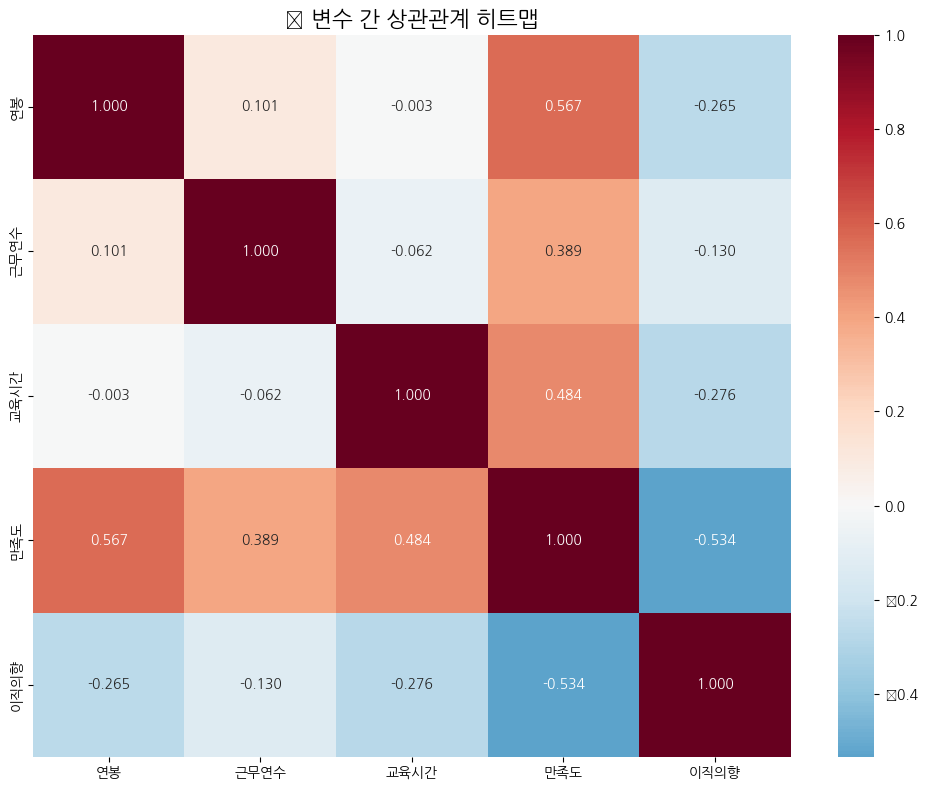

In [ ]:
#3.3. 상관관계 히트맵

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.3f')

plt.title('📊 변수 간 상관관계 히트맵', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
#3.4. 부서별 만족도 비교

dept_summary = df_hr.groupby('부서')['만족도'].mean()

print("📊 부서별 평균 만족도")
print(dept_summary.round(2))

dept_turnover = df_hr.groupby('부서')['이직의향'].mean()

print("\n📈 부서별 이직의향")
print(dept_turnover.round(3))

print("\n📝 부서별 상세 분석")
for dept in df_hr['부서'].unique():
    dept_data = df_hr[df_hr['부서'] == dept]

    satisfaction_avg = dept_data['만족도'].mean()
    turnover_avg = dept_data['이직의향'].mean()

    print(f"{dept}부: 만족도 {satisfaction_avg:.1f}점, 이직의향 {turnover_avg:.1%}")

#개발팀: 만족도 가장 높고, 이직의향 가장 낮다
#영업부: 만족도 가장 낮고, 이직의향 가장 높다

📊 부서별 평균 만족도
부서
개발     7.76
마케팅    7.82
영업     6.96
인사     6.93
Name: 만족도, dtype: float64

📈 부서별 이직의향
부서
개발     0.139
마케팅    0.208
영업     0.276
인사     0.278
Name: 이직의향, dtype: float64

📝 부서별 상세 분석
개발부: 만족도 7.8점, 이직의향 13.9%
마케팅부: 만족도 7.8점, 이직의향 20.8%
영업부: 만족도 7.0점, 이직의향 27.6%
인사부: 만족도 6.9점, 이직의향 27.8%


In [ ]:
#3.5. 더미 변수 생성

dept_dummies = pd.get_dummies(df_hr['부서'], prefix='부서')

rank_dummies = pd.get_dummies(df_hr['직급'], prefix='직급')

dept_dummies = dept_dummies.drop('부서_인사', axis=1)
rank_dummies = rank_dummies.drop('직급_사원', axis=1)

print("부서:", list(dept_dummies.columns))
print("직급:", list(rank_dummies.columns))

부서: ['부서_개발', '부서_마케팅', '부서_영업']
직급: ['직급_과장', '직급_대리', '직급_부장']


In [ ]:
#3.6. 회귀분석용 데이터 준비

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_vars = pd.concat([df_hr[['연봉', '근무연수', '교육시간']], dept_dummies, rank_dummies], axis=1)

y_var = df_hr['만족도']

print("📊 회귀분석 변수 구성")
print(f"독립변수 개수: {len(X_vars.columns)}개")
print(f"독립변수: {list(X_vars.columns)}")
print(f"종속변수: 만족도")

📊 회귀분석 변수 구성
독립변수 개수: 9개
독립변수: ['연봉', '근무연수', '교육시간', '부서_개발', '부서_마케팅', '부서_영업', '직급_과장', '직급_대리', '직급_부장']
종속변수: 만족도


In [ ]:
#3.7. 회귀분석 실행

model = LinearRegression()
model.fit(X_vars, y_var)

y_pred = model.predict(X_vars)

r2 = r2_score(y_var, y_pred)

print("📊 다중회귀분석 결과")
print(f"R² (설명력): {r2:.3f} ({r2*100:.1f}%)")

📊 다중회귀분석 결과
R² (설명력): 0.800 (80.0%)


In [ ]:
#3.8. 회귀계수 해석

coefficients = pd.DataFrame({
    '변수': X_vars.columns,
    '계수': model.coef_,
    '절댓값': np.abs(model.coef_)
})


coefficients = coefficients.sort_values('절댓값', ascending=False)

print("🔍 회귀계수 분석 (영향력 순)")
print(coefficients.head(5))


most_important = coefficients.iloc[0]
print(f"\n가장 영향력이 큰 변수: {most_important['변수']} (계수: {most_important['계수']:.3f})")

#기준: 사원
#사원 직급에 비해 부장 직급이 다른 조건이 동일할 때, 직원 만족도를 1.39점 높이는 요인


🔍 회귀계수 분석 (영향력 순)
      변수        계수       절댓값
8  직급_부장  1.393631  1.393631
6  직급_과장  0.764017  0.764017
3  부서_개발  0.497000  0.497000
5  부서_영업 -0.496424  0.496424
7  직급_대리  0.325535  0.325535

가장 영향력이 큰 변수: 직급_부장 (계수: 1.394)


In [ ]:
#3.9. 로지스틱 회귀

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_logistic = X_vars
y_logistic = df_hr['이직의향'] #목표 변수

turnover_summary = df_hr['이직의향'].value_counts() #이직의향 수
turnover_rate = df_hr['이직의향'].mean() #이직의향 비율

print("📊 현재 이직 의향 현황")
print(f"이직 의향 있음: {turnover_summary[1]}명 ({turnover_rate:.1%})")
print(f"이직 의향 없음: {turnover_summary[0]}명 ({1-turnover_rate:.1%})")


📊 현재 이직 의향 현황
이직 의향 있음: 51명 (20.4%)
이직 의향 없음: 199명 (79.6%)


In [ ]:
#3.10. 로지스틱 회귀 학습

logistic_model = LogisticRegression(random_state=42, max_iter=1000)

#y_logistic= 이직의향
logistic_model.fit(X_logistic, y_logistic)

#predict_proba(): [클래스 0의 확률, 클래스 1의 확률]
#[:, 1] = 이직 의향 있음(1) 클래스 확률만 추출
y_pred_proba = logistic_model.predict_proba(X_logistic)[:, 1]

y_pred_class = logistic_model.predict(X_logistic)

accuracy = (y_pred_class == y_logistic).mean()

print("🤖 로지스틱 회귀 모델 성능")
print(f"정확도: {accuracy:.3f}")

#학습 데이터 자체로 예측 수행해서 높게 나왔을수도 있음 (X_logistic)

🤖 로지스틱 회귀 모델 성능
정확도: 0.864


In [ ]:
#3.11. 혼동 행렬

cm = confusion_matrix(y_logistic, y_pred_class)

print("📋 혼동 행렬")
print("실제 ⇒ 예측  이직안함  이직함")
print(f"이직 안함     {cm[0,0]:3d}    {cm[0,1]:3d}")
print(f"이직 함       {cm[1,0]:3d}    {cm[1,1]:3d}")

precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0

recall = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0

#모델이 이직할 것이다 라고 예측한 사람들 중 실제로 이직 의향이 있는 사람
print(f"\n정밀도: {precision:.3f}")
#실제로 이직 의향이 있는 사람 중 모델이 올바르게 찾아낸 정도
print(f"재현율: {recall:.3f}")

📋 혼동 행렬
실제 ⇒ 예측  이직안함  이직함
이직 안함     193      6
이직 함        28     23

정밀도: 0.793
재현율: 0.451


In [ ]:
#3.12. 오즈비 계산

odds_ratios = np.exp(logistic_model.coef_[0])

odds_analysis = pd.DataFrame({
    '변수': X_logistic.columns,
    '계수': logistic_model.coef_[0],
    '오즈비': odds_ratios,
    '위험도변화': [(or_val - 1) * 100 for or_val in odds_ratios]
})

odds_analysis = odds_analysis.sort_values('위험도변화', key=abs, ascending=False)

print("🎯 이직 위험 요인 분석 (상위 5개)")
print(odds_analysis.head())

#직급이 높을수록 이직 위험이 낮아진다
#영업부서는 이직 위험이 높다

  #과장, 부장 > 이직 위험은 60% 정도 감소하는 요인
  #개발 부서 > 이직 위험 47% 정도 감소

  #영업 부서 > 같은 조건이라도 영업부서라면 이직 확률 60% 증가

🎯 이직 위험 요인 분석 (상위 5개)
      변수        계수       오즈비      위험도변화
6  직급_과장 -0.976027  0.376805 -62.319493
8  직급_부장 -0.960123  0.382846 -61.715429
5  부서_영업  0.473843  1.606155  60.615491
3  부서_개발 -0.630661  0.532240 -46.776002
7  직급_대리 -0.603491  0.546899 -45.310074


In [ ]:
#3.13. 고위험군 식별

#이직 확률이 70% 이상인 경우
high_risk_threshold = 0.7

#확률이 0.7보다 높은 직원들만 추출 = 고위험군 식별
high_risk_mask = y_pred_proba > high_risk_threshold
high_risk_employees = df_hr[high_risk_mask]

print(f"🎯 이직 고위험군 식별")
print(f"이직 확률 {high_risk_threshold:.0%} 이상 직원: {len(high_risk_employees)}명")

if len(high_risk_employees) > 0:
    print("고위험군 특징:")
    avg_satisfaction = high_risk_employees['만족도'].mean()

    avg_salary = high_risk_employees['연봉'].mean()

    print(f" • 평균 만족도: {avg_satisfaction:.1f}점")
    print(f" • 평균 연봉: {avg_salary/10000:.0f}만원")

#평균보다는 만족도가 낮을수도...
#연봉이 평균보다 낮다면 보상 문제가 주요 문제일수도
#개별 면담 우선 순위 결정이나 피드백 체계 강화 등의 전략을 세울 수 있다

🎯 이직 고위험군 식별
이직 확률 70% 이상 직원: 10명
고위험군 특징:
 • 평균 만족도: 3.6점
 • 평균 연봉: 3만원


In [ ]:
#3.14. 최종 권고안

print("=" * 60)
print("📄 CEO 보고 요약: 직원 만족도 및 이직 방지 전략")
print("=" * 60)

print("\n📊 현황 요약")
print(f" • 전체 직원 만족도: {df_hr['만족도'].mean():.1f}/10점")
#이직의향이 1인 사람의 비율
print(f" • 현재 이직 의향률: {df_hr['이직의향'].mean():.1%}")
#이직 확률이 70%보다 높은 사람
print(f" • 고위험군: {len(high_risk_employees)}명")

print("\n🏢 부서별 위험도 분석")
dept_risk = df_hr.groupby('부서')['이직의향'].mean().sort_values(ascending=False)

for dept, risk in dept_risk.items():
    if risk > 0.3:  # 30% 이상이면 높은 위험
        emoji = "🔴"
        level = "높음"
    elif risk > 0.15:  # 15% 이상이면 보통
        emoji = "🟡"
        level = "보통"
    else:
        emoji = "🟢"
        level = "낮음"

    print(f"{emoji} {dept}부: 이직률 {risk:.1%} (위험도: {level})")

# TODO: 핵심 발견사항 정리하기
print(f"\n💡 핵심 발견사항")
most_important_factor = coefficients.iloc[0] # 이전 선형회귀분석에서 계산
print(f" • 만족도에 가장 큰 영향: {most_important_factor['변수']}")

# TODO: 권장 액션 플랜 작성하기
print(f"\n🚀 권장 액션 플랜")
highest_risk_dept = dept_risk.index[0]
print(f" • 즉시 조치 필요: {highest_risk_dept}부 집중 관리")
print(f" • 투자 우선순위: 만족도 개선 프로그램")
print(f" • 모니터링: 월별 만족도 조사 실시")


#이직률: 전체 20.4%
#위험 부서: 인사부, 영업부, 마케팅부가 보통 수준 이상
#주요 원인: 직급이 가장 만족도와 관련도가 높았다 > 직급 분포 불균형..?
#우선조치: 위험 부서 중심 관리 시도
#추진 전략: 만족도 개선(승진개획 또는 보상체계 강화 등)

📄 CEO 보고 요약: 직원 만족도 및 이직 방지 전략

📊 현황 요약
 • 전체 직원 만족도: 7.5/10점
 • 현재 이직 의향률: 20.4%
 • 고위험군: 10명

🏢 부서별 위험도 분석
🟡 인사부: 이직률 27.8% (위험도: 보통)
🟡 영업부: 이직률 27.6% (위험도: 보통)
🟡 마케팅부: 이직률 20.8% (위험도: 보통)
🟢 개발부: 이직률 13.9% (위험도: 낮음)

💡 핵심 발견사항
 • 만족도에 가장 큰 영향: 직급_부장

🚀 권장 액션 플랜
 • 즉시 조치 필요: 인사부 집중 관리
 • 투자 우선순위: 만족도 개선 프로그램
 • 모니터링: 월별 만족도 조사 실시
